## Co giãn đặc trưng (Feature Scaling)

Trước đó chúng ta đã thảo luận rằng tỷ lệ đặc trưng khá quan trọng khi xây dựng các mô hình học máy. Cụ thể:


### Độ lớn của đặc trưng quan trọng vì:

- Các hệ số hồi quy của mô hình tuyến tính bị ảnh hưởng trực tiếp bởi phép biến đổi tỷ lệ của biến.
- Các biến có độ lớn/phạm vi giá trị lớn hơn sẽ vượt trội hơn so với các biến có độ lớn/phạm vi giá trị nhỏ hơn.
- Gradient descent hội tụ nhanh hơn khi các đặc trưng có cùng thang đo.
- Co giãn đặc trưng giúp làm giảm thời gian tìm các vectơ hỗ trợ cho SVM.
- Khoảng cách Euclid nhạy với độ lớn của đặc trưng.
- Một số thuật toán như PAC yêu cầu các đặc trưng tập trung ở 0.


### Các mô hình học máy bị ảnh hưởng trực tiếp bởi co giãn đặc trưng:

- Hồi quy tuyến tính và Hồi quy Logistic 
- Mạng nơ-ron
- Máy vectơ hỗ trợ (SVM)
- KNN 
- Phân cụm K-means
- Phân tích phân biệt tuyến tính (LDA)
- Phân tích thành phần chính (PCA)


### Co giãn đặc trưng

**Co giãn đặc trưng** đề cập đến các phương pháp hoặc kỹ thuật chuẩn hóa phạm vi của các biến độc lập trong dữ liệu hay nói cách khác, các phương pháp đặt phạm vi giá trị đặc trưng trong cùng một phép chia tỷ lệ. Co giãn đặc trưng thường là bước cuối cùng trong quy trình tiền xử lý dữ liệu, được thực hiện **ngay trước khi huấn luyện các thuật toán học máy**.

 Chúng ta sẽ bàn về một số kỹ thuật Co giãn đặc trưng:

- Chuẩn tắc hóa (Standardisation)
- Chuẩn hóa trung bình (Mean normalisation)
- Co giãn về min/max - MinMaxScaling
- Co giãn về giá trị lớn nhất tuyệt đối - MaxAbsScaling
- Co giãn về trung vị và phân vị - RobustScaling
- Chuẩn hóa độ dài vectơ đơn vị

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# tập dữ liệu cho mô phỏng 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# scaler - cho chuẩn tắc hóa
from sklearn.preprocessing import StandardScaler

# scaler - cho chuẩn hóa trung bình
from sklearn.preprocessing import StandardScaler, RobustScaler

# scaler - cho MaxAbsScaling, có chỉnh tâm
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

# scaler - cho robustscaling
from sklearn.preprocessing import RobustScaler

# scaler - cho robustscaling
from sklearn.preprocessing import Normalizer

In [2]:
# load dữ liệu giá nhà ở Boston

# cách chúng ta load tập dữ liệu boston từ sklearn
boston_dataset = load_boston()

# tạo một dataframe với các biến độc lập
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# thêm target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Thông tin về tập dữ liệu giá nhà ở boston
# chúng ta sẽ thấy thông tin chi tiết về các biến khác nhau

# mục đích là đoán "giá trị trung bình của các ngôi nhà"
# cột MEDV trong tập dữ liệu này

# và có các biến với đặc điểm về
# nhà và khu dân cư

# in ra mô tả tập dữ liệu
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
# hãy xem các tham số thông kê chính của các biến
# để biết độ lớn của các đặc trưng

data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Các biến khác nhau thể hiện các phạm vi giá trị khác nhau: mean, max, min, độ lệch chuẩn,... Nói cách khác, chúng hiển thị các độ lớn hoặc thang đo khác nhau. Lưu ý cách **các giá trị trung bình không được căn giữa ở 0 và độ lệch chuẩn không được co giãn thành 1** với bản mô phỏng này.

In [4]:
# hãy chia thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

Trong phần này, chúng ta sẽ bàn về **chuẩn tắc hóa**.

=================================================================

## Chuẩn tắc hóa 

Chuẩn tắc hóa gồm căn giữa biến ở 0 và chuẩn tắc hóa phương sai thành 1. Quy trình là trừ đi mean của mỗi quan sát rồi chia cho độ lệch chuẩn:

**z = (x - x_mean)/std**

Kết quả của phép biến đổi trên là **z**, được gọi là z-score thể hiện độ lệch chuẩn mà một quan sát nhất định lệch khỏi mean. z-score xác định vị trí của quan sát trong một phân phối (theo số lượng độ lệch chuẩn với giá trị trung bình của phân phối). Dấu của z-score (+ hoặc -) cho biết quan sát nằm trên (+) hay dưới (-) mean.


Hình dạng của phân phối chuẩn tắc hóa (hoặc chuẩn hóa z-score) sẽ giống với phân phối ban đầu của biến. Nếu phân phối ban đầu là chuẩn thì phân phối chuẩn tắc hóa sẽ là chuẩn. Nhưng nếu phân phối ban đầu bị lệch thì phân phối chuẩn tắc hóa của biến cũng sẽ bị lệch. Nói cách khác, **chuẩn tắc hóa một biến không chuẩn hóa phân phối của dữ liệu** và nếu đây là kết quả mong muốn, chúng ta nên thực hiện bất kỳ kỹ thuật nào được thảo luận trong phần 7 của khóa học.


Tóm lại, chuẩn tắc hóa:

- căn giữa mean ở 0
- co giãn phương sai ở 1
- duy trì hình dạng của phân phối ban đầu
- giá trị min/max của các biến khác nhau thay đổi
- duy trì outlier

Chuẩn tắc hóa tốt với các thuật toán yêu cầu đặc trung tập trung ở 0.

## Trong bản mô phỏng này

Chúng ta sẽ thực hiện chuẩn tắc hóa sử dụng tập dữ liệu giá nhà ở Boston cùng với Scikit-learn.

Khi chuẩn tắc hóa tập dữ liệu, trước tiên chúng ta cần xác định giá trị trung bình và độ lệch chuẩn của các biến. Các tham số này cần được lấy từ tập huấn luyện, lưu trữ rồi sử dụng để kiểm tra quy mô và dữ liệu trong tương lai. Vậy trước tiên, chúng ta sẽ chia dữ liệu thành tập huấn luyện và tập kiểm tra.

### Chuẩn tắc hóa

StandardScaler từ scikit-learn loại bỏ mean và co giãn dữ liệu thành phương sai đơn vị. Thêm vào đó, nó tìm hiểu và lưu trữ các tham số cần thiết để co giãn. Do đó, đây là lựa chọn hàng đầu cho kỹ thuật co giãn đặc trưng.

Mặt khác, chúng ta không thể lựa chọn trực tiếp co giãn các biến, nó sẽ co giãn toàn bộ tập dữ liệu và trả về một mảng NumPy mà không có các giá trị biến. 

In [5]:
## Yêu cầu 1
# chuẩn tắc hóa: với StandardScaler từ sklearn

# thiết lập StandardScaler
## VIẾT CODE Ở ĐÂY:
scaler = StandardScaler()

# khớp scaler với tập huấn luyện, nó sẽ học các tham số
## VIẾT CODE Ở ĐÂY:
scaler.fit(X_train)

# biến đổi tập huấn luyện và tập kiểm tra
## VIẾT CODE Ở ĐÂY:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

<details><summary> Gợi ý </summary>

[StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

</details>

In [6]:
# scaler lưu trữ mean của các đặc trưng đã học từ tập huấn luyện

scaler.mean_

array([3.35828432e+00, 1.18093220e+01, 1.10787571e+01, 6.49717514e-02,
       5.56098305e-01, 6.30842655e+00, 6.89940678e+01, 3.76245876e+00,
       9.35310734e+00, 4.01782486e+02, 1.84734463e+01, 3.60601186e+02,
       1.24406497e+01])

In [7]:
# scaler lưu trữ độ lệch chuẩn của các đặc trưng
# đã học từ tập huấn luyện

scaler.scale_

array([8.34141658e+00, 2.36196246e+01, 6.98393565e+00, 2.46476009e-01,
       1.15437239e-01, 7.01016354e-01, 2.79987983e+01, 2.06473886e+00,
       8.65974217e+00, 1.70351284e+02, 2.22166426e+00, 8.55009244e+01,
       7.06848020e+00])

In [8]:
# biến đổi các mảng NumPy đã trả về vào các dataframe cho phần còn lại của
# bản mô phỏng

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [9]:
# hãy xem tập dữ liệu huấn luyện ban đầu: giá trị trung bình và độ lệch chuẩn
# sử dụng np.round để giảm số lượng thập phân xuống 1.

np.round(X_train.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,3.4,11.8,11.1,0.1,0.6,6.3,69.0,3.8,9.4,401.8,18.5,360.6,12.4
std,8.4,23.7,7.0,0.2,0.1,0.7,28.0,2.1,8.7,170.6,2.2,85.6,7.1
min,0.0,0.0,0.5,0.0,0.4,3.6,2.9,1.2,1.0,187.0,12.6,0.3,1.7
25%,0.1,0.0,5.0,0.0,0.4,5.9,45.2,2.1,4.0,276.0,17.4,376.1,6.7
50%,0.3,0.0,8.6,0.0,0.5,6.2,79.4,3.2,5.0,311.0,19.1,391.6,11.2
75%,3.1,20.0,18.1,0.0,0.6,6.6,93.8,5.1,24.0,666.0,20.2,395.7,16.7
max,89.0,100.0,27.7,1.0,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,37.0


In [10]:
# hãy xem tập dữ liệu huấn luyện sau khi đã co giãn: giá trị trung bình và độ lệch chuẩn
# sử dụng np.round để giảm số lượng thập phân xuống 1.

np.round(X_train_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-0.4,-0.5,-1.5,-0.3,-1.5,-3.9,-2.4,-1.3,-1.0,-1.3,-2.6,-4.2,-1.5
25%,-0.4,-0.5,-0.9,-0.3,-0.9,-0.6,-0.9,-0.8,-0.6,-0.7,-0.5,0.2,-0.8
50%,-0.4,-0.5,-0.4,-0.3,-0.2,-0.1,0.4,-0.3,-0.5,-0.5,0.3,0.4,-0.2
75%,-0.0,0.3,1.0,-0.3,0.6,0.5,0.9,0.6,1.7,1.6,0.8,0.4,0.6
max,10.3,3.7,2.4,3.8,2.7,3.5,1.1,4.1,1.7,1.8,1.6,0.4,3.5


Như dự kiến, giá trị trung bình của từng biến trước đó không căn giữa ở 0 giờ đã ở quanh 0 và độ lệch chuẩn được đặt thành 1. Tuy nhiên, lưu ý rằng giá trị min/max thay đổi tùy theo mức độ lan truyền của biến và bị ảnh hưởng lớn bởi sự có mặt của các outlier.

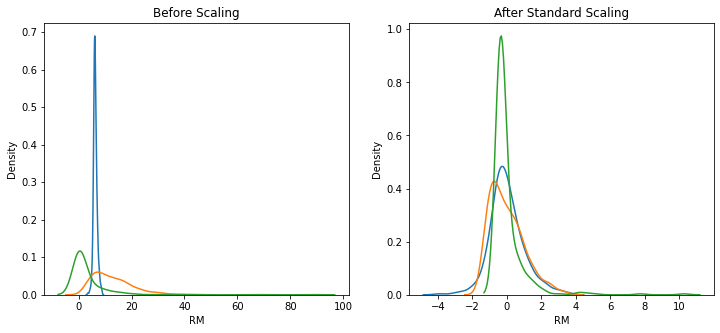

In [11]:
# so sánh phân phối của biến trước và sau khi co giãn

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# trước khi co giãn
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# sau khi co giãn
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

Từ các biểu đồ trên, chuẩn tắc hóa tập trung tất cả các phân phối ở 0 nhưng vẫn giữ nguyên phân phối ban đầu của chúng. Phạm vi giá trị không giống nhau, nhưng nó trông đồng nhất hơn trên các biến.

Chú ý một số điều thú vị trong biểu đồ sau:

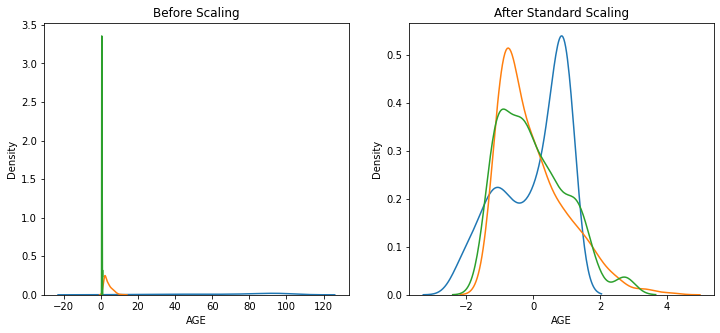

In [12]:
# so sánh phân phối của biến trước và sau khi co giãn

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# trước khi co giãn
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# sau khi co giãn
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

In [13]:
X_train['AGE'].min(), X_train['AGE'].max(), 

(2.9, 100.0)

Trong biểu đồ trên, chúng ta thấy biến NOX thay đổi trong một phạm vi giá trị rất hẹp [0-1] và AGE thay đổi trong phạm vi [0-100] khi co giãn, giờ đây đã trải rộng trên phạm vi các giá trị đồng nhất hơn, do đó chúng ta có thể so sánh chúng trực tiếp trong một biểu đồ, trong khi trước đây điều này rất khó thực hiện. Trong mô hình tuyến tính, AGE sẽ chi phối đầu ra nhưng sau khi chuẩn tắc hóa, cả hai biến đều có đầu vào (giả sử cả 2 đều mang tính dự đoán).

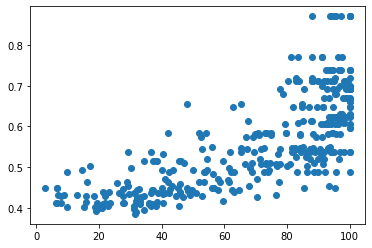

In [14]:
plt.scatter(X_train['AGE'], X_train['NOX'])

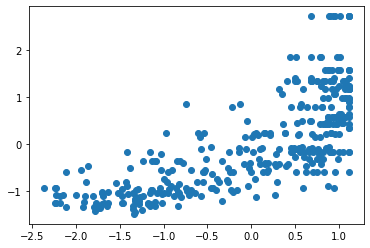

In [15]:
plt.scatter(X_train_scaled['AGE'], X_train_scaled['NOX'])

Ở phần này, chúng ta sẽ bàn về **Chuẩn hóa trung bình**.

=================================================================

## Chuẩn hóa trung bình


Chuẩn hóa trung bình gồm việc căn giữa các biến ở 0 và điều chỉnh lại phạm vi giá trị. Quy trình gồm việc trừ đi giá trị trung bình của mỗi quan sát rồi chia cho hiệu giữa max và min:

**x_scaled = (x - x_mean)/( x_max - x_min)**


Kết quả của phép biến đổi trên là một phân phối căn giữa 0 và min/max nằm trong phạm vi từ -1 đến 1. Hình dạng của phân phối chuẩn hóa trung bình sẽ tương tự như của phân phối ban đầu, nhưng phương sai có thể thay đổi nên sẽ không giống hệt nhau.


Một lần nữa, kỹ thuật này sẽ không **chuẩn hóa phân phối của dữ liệu**, do đó nếu đây là kết quả mong muốn, chúng ta nên thực hiện thêm bất kỳ kỹ thuật nào đã thảo luận trong phần 7 của khóa học.

Tóm lại, chuẩn hóa trung bình:

- tập trung mean ở 0
- variance will be different phương sai sẽ khác
- may alter the shape of the original distribution có thể thay đổi hình dạng của phân phối ban đầu
- min và max nằm trong khoảng từ -1 đến 1
- duy trì các outlier

Chuẩn hóa trung bình khá tốt với các thuật toán yêu cầu đặc trưng căn giữa ở 0.


## Trong mô phỏng này

Chúng ta sẽ thực hiện chuẩn hóa trung bình sử dụng tập dữ liệu giá nhà ở Boston với Scikit-learn.

Scikit-learn không có transformer cho chuẩn hóa trung bình nhưng chúng ta có thể triển khai bằng cách sử dụng tổ hợp 2 transformer khác mà chúng ta sẽ thảo luận trong notebook tới. Chúng ta cũng sẽ thực hiện thủ công với pandas.

Khi thực hiện chuẩn hóa trung bình trên tập dữ liệu, trước tiên chúng ta cần xác định các giá trị mean, max, min của các biến. Các tham số này cần được học từ tập huấn luyện, lưu trữ rồi sử dụng để kiểm tra quy mô và dữ liệu trong tương lai. Vậy trước tiên, chúng ta sẽ chia dữ liệu thành tập huấn luyện và tập kiểm tra như đã làm trong suốt khóa học.

### Chuẩn hóa trung bình với pandas

In [16]:
## Yêu cầu 2
# trước tiên tìm hiểu mean từ tập huấn luyện

## VIẾT CODE Ở ĐÂY:
means = X_train.mean(axis=0)
means

CRIM         3.358284
ZN          11.809322
INDUS       11.078757
CHAS         0.064972
NOX          0.556098
RM           6.308427
AGE         68.994068
DIS          3.762459
RAD          9.353107
TAX        401.782486
PTRATIO     18.473446
B          360.601186
LSTAT       12.440650
dtype: float64

In [17]:
## Yêu cầu 3
# giờ hãy tìm hiểu min, max và phạm vi giá trị
# from the train set

## VIẾT CODE Ở ĐÂY:
ranges = X_train.max(axis=0)-X_train.min(axis=0)
ranges

CRIM        88.96988
ZN         100.00000
INDUS       27.28000
CHAS         1.00000
NOX          0.48600
RM           5.21900
AGE         97.10000
DIS         10.95230
RAD         23.00000
TAX        524.00000
PTRATIO      9.40000
B          396.58000
LSTAT       35.25000
dtype: float64

In [18]:
## Yêu cầu 4
# chúng ta đã sẵn sàng để chuấn hóa trung bình:

## VIẾT CODE Ở ĐÂY:
X_train_scaled = (X_train - means) / ranges
X_test_scaled = (X_test - means) / ranges

In [19]:
# hãy xem tập dữ liệu huấn luyện ban đầu: các giá trị mean, min, max
# sử dụng np.round để giảm số lượng số thập phân xuống còn 1

np.round(X_train.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,3.4,11.8,11.1,0.1,0.6,6.3,69.0,3.8,9.4,401.8,18.5,360.6,12.4
std,8.4,23.7,7.0,0.2,0.1,0.7,28.0,2.1,8.7,170.6,2.2,85.6,7.1
min,0.0,0.0,0.5,0.0,0.4,3.6,2.9,1.2,1.0,187.0,12.6,0.3,1.7
25%,0.1,0.0,5.0,0.0,0.4,5.9,45.2,2.1,4.0,276.0,17.4,376.1,6.7
50%,0.3,0.0,8.6,0.0,0.5,6.2,79.4,3.2,5.0,311.0,19.1,391.6,11.2
75%,3.1,20.0,18.1,0.0,0.6,6.6,93.8,5.1,24.0,666.0,20.2,395.7,16.7
max,89.0,100.0,27.7,1.0,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,37.0


In [20]:
# hãy xem tập dữ liệu huấn luyện đã co giãn:  các giá trị mean, min, max
# sử dụng np.round để giảm số lượng số thập phân xuống còn 1

np.round(X_train_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0
std,0.1,0.2,0.3,0.2,0.2,0.1,0.3,0.2,0.4,0.3,0.2,0.2,0.2
min,-0.0,-0.1,-0.4,-0.1,-0.4,-0.5,-0.7,-0.2,-0.4,-0.4,-0.6,-0.9,-0.3
25%,-0.0,-0.1,-0.2,-0.1,-0.2,-0.1,-0.2,-0.2,-0.2,-0.2,-0.1,0.0,-0.2
50%,-0.0,-0.1,-0.1,-0.1,-0.0,-0.0,0.1,-0.0,-0.2,-0.2,0.1,0.1,-0.0
75%,-0.0,0.1,0.3,-0.1,0.2,0.1,0.3,0.1,0.6,0.5,0.2,0.1,0.1
max,1.0,0.9,0.6,0.9,0.6,0.5,0.3,0.8,0.6,0.6,0.4,0.1,0.7


Như dự kiến, giá trị trung bình của từng biến trước đó không căn giữa ở 0 thì giờ ở quanh 0, và các giá trị min, max thay đổi trong khoảng từ -1 đến 1. Tuy nhiên, độ lệch chuẩn thay đổi tùy theo mức độ lan truyền của biến đó và bị ảnh hưởng nhiều bởi sự có mặt của các outlier.

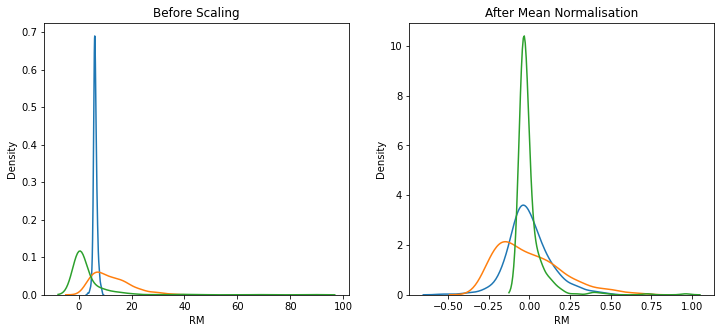

In [21]:
# so sánh phân phối của biến trước và sau khi co giãn

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# trước khi co giãn
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# sau khi co giãn
ax2.set_title('After Mean Normalisation')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

Chúng ta thấy tác động chính của chuẩn hóa trung bình là tập trung tất cả các phân phối ở 0 và các giá trị thay đổi giữa -1 và 1.

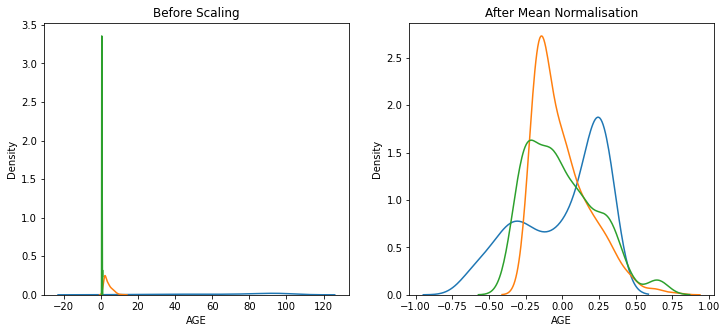

In [22]:
# so sánh phân phối của biến trước và sau khi co giãn

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# trước khi co giãn
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# sau khi co giãn
ax2.set_title('After Mean Normalisation')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

So sánh các biểu đồ này với các biểu đồ thu được bằng cách chuẩn tắc hóa để hiểu các quy trình này không giống nhau.

### Chuẩn hóa trung bình với Scikit-learn: giải pháp thay thế

Chúng ta có thể triển khai chuẩn hóa trung bình bằng cách kết hợp sử dụng 2 transformer nếu muốn thực hiện kỹ thuật này với sklearn.

In [25]:
## Yêu cầu 5
# thiết lập StandardScaler để nó loại bỏ mean
# nhưng không chia cho độ lêch chuẩn

## VIẾT CODE Ở ĐÂY:
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# thiết lập robustscaler để nó KHÔNG loại median
# nhưng chuẩn hóa bằng max()-min(), quan trọng với
# phạm vi quantile từ 0-100, thể hiện min và max

## VIẾT CODE Ở ĐÂY:
scaler_minmax = RobustScaler(with_centering=False,
                             with_scaling=True,
                             quantile_range=(0, 100))

# khớp scaler với tập huấn luyện để nó học các tham số
## VIẾT CODE Ở ĐÂY:
scaler_mean.fit(X_train)
scaler_minmax.fit(X_train)

# biến đổi tập huấn luyện và tập kiểm tra
## VIẾT CODE Ở ĐÂY:
X_train_scaled = scaler_minmax.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_minmax.transform(scaler_mean.transform(X_test))

<details><summary> Gợi ý </summary>

[StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

[RobustScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

</details>

In [26]:
# biến đổi các mảng NumPy đã trả về vào các dataframe cho phần còn lại của
# bản mô phỏng

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [27]:
np.round(X_train_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
std,0.1,0.2,0.3,0.2,0.2,0.1,0.3,0.2,0.4,0.3,0.2,0.2,0.2
min,-0.0,-0.1,-0.4,-0.1,-0.4,-0.5,-0.7,-0.2,-0.4,-0.4,-0.6,-0.9,-0.3
25%,-0.0,-0.1,-0.2,-0.1,-0.2,-0.1,-0.2,-0.2,-0.2,-0.2,-0.1,0.0,-0.2
50%,-0.0,-0.1,-0.1,-0.1,-0.0,-0.0,0.1,-0.0,-0.2,-0.2,0.1,0.1,-0.0
75%,-0.0,0.1,0.3,-0.1,0.2,0.1,0.3,0.1,0.6,0.5,0.2,0.1,0.1
max,1.0,0.9,0.6,0.9,0.6,0.5,0.3,0.8,0.6,0.6,0.4,0.1,0.7


Đầu ra này giống với đầu ra của cell 10, khi chúng ta đã thực hiện co giãn theo cách thủ công.

Trong phần này, chúng ta sẽ bàn về **MinMaxScaling**.

=================================================================

## Co giãn về min/max - MinMaxScaling

Co giãn về min-max các giá trị từ 0 đến 1. Nó trừ min từ tất cả các quan sát rồi chia cho phạm vi giá trị:

X_scaled = (X - X.min / (X.max - X.min)


Kết quả của phép biến đổi trên là phân phối có các giá trị thay đổi trong phạm vi từ 0 đến 1. Nhưng giá trị trung bình không tập trung ở 0 và độ lệch chuẩn cũng thay đổi trong các biến. Hình dạng của phân phối khi co giãn max/min sẽ tương tự như phân phối ban đầu, nhưng phương sai có thể thay đổi nên chúng sẽ không giống nhau. Kỹ thuật co giãn này cũng nhạy với các outlier.

Kỹ thuật này sẽ không **chuẩn hóa phân phối của dữ liệu** do đó nếu đây là kết quả mong muốn, chúng ta nên thực hiện bất kỳ kỹ thuật nào đã thảo luận trong phần 7 của khóa học.

Tóm lại, MinMaxScaling:

- không tập trung mean ở 0
- phương sai thay đổi trên các biến
- có thể không duy trì hình dạng của phân phối ban đầu
- các giá trị min và max là 0  và 1 
- nhạy với outlier


## Trong bản mô phỏng này

Chúng ta sẽ thực hiện co giãn về min-max sử dụng tập dữ liệu giá nhà ở Boston với Scikit-learn.

Khi thực hiện co giãn về min-max trên tập dữ liệu, trước tiên chúng ta cần xác định min, max của các biến. Các tham số này cần được học từ tập huấn luyện, lưu trữ rồi sử dụng để kiểm tra quy mô và dữ liệu trong tương lai. Vậy trước tiên, chúng ta sẽ chia dữ liệu thành huấn luyện và tập kiểm tra như đã làm trong suốt khóa học.

### MinMaxScaling

MinMaxScaler từ scikit-learn trừ min và chia lại tỷ lệ phạm vi giá trị, hiển thị các giá trị biến trong khoảng từ 0 đến 1.

In [28]:
## Yêu cầu 6
# thiết lập MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# khớp scaler với tập huấn luyện, nó sẽ học các tham số
## VIẾT CODE Ở ĐÂY:
scaler.fit(X_train)

# biến đổi tập huấn luyện và tập kiểm tra
## VIẾT CODE Ở ĐÂY:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

<details><summary> Gợi ý </summary>

[MinMaxScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

</details>

In [29]:
# scaler lưu trữ max của các đặc trưng đã học từ tập huấn luyện
scaler.data_max_

array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        36.98  ])

In [30]:
# scaler lưu trữ min của các đặc trưng đã học từ tập huấn luyện
scaler.min_

array([-7.10352762e-05,  0.00000000e+00, -1.68621701e-02,  0.00000000e+00,
       -7.92181070e-01, -6.82314620e-01, -2.98661174e-02, -1.07210358e-01,
       -4.34782609e-02, -3.56870229e-01, -1.34042553e+00, -8.06898986e-04,
       -4.90780142e-02])

In [31]:
# scaler cũng lưu trữ phạm vi giá trị (max - min)

scaler.data_range_

array([8.896988e+01, 1.000000e+02, 2.728000e+01, 1.000000e+00,
       4.860000e-01, 5.219000e+00, 9.710000e+01, 1.095230e+01,
       2.300000e+01, 5.240000e+02, 9.400000e+00, 3.965800e+02,
       3.525000e+01])

In [32]:
# biến đổi các mảng NumPy đã trả về vào các dataframe cho phần còn lại của
# bản mô phỏng

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [33]:
# hãy xem tập dữ liệu huấn luyện ban đầu: các giá trị min, max
# sử dụng np.round để giảm số lượng số thập phân xuống còn 1

np.round(X_train.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,3.4,11.8,11.1,0.1,0.6,6.3,69.0,3.8,9.4,401.8,18.5,360.6,12.4
std,8.4,23.7,7.0,0.2,0.1,0.7,28.0,2.1,8.7,170.6,2.2,85.6,7.1
min,0.0,0.0,0.5,0.0,0.4,3.6,2.9,1.2,1.0,187.0,12.6,0.3,1.7
25%,0.1,0.0,5.0,0.0,0.4,5.9,45.2,2.1,4.0,276.0,17.4,376.1,6.7
50%,0.3,0.0,8.6,0.0,0.5,6.2,79.4,3.2,5.0,311.0,19.1,391.6,11.2
75%,3.1,20.0,18.1,0.0,0.6,6.6,93.8,5.1,24.0,666.0,20.2,395.7,16.7
max,89.0,100.0,27.7,1.0,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,37.0


In [34]:
# hãy xem tập dữ liệu huấn luyện đã co giãn: các giá trị min, max
# sử dụng np.round để giảm số lượng số thập phân xuống còn 1

np.round(X_train_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,0.0,0.1,0.4,0.1,0.4,0.5,0.7,0.2,0.4,0.4,0.6,0.9,0.3
std,0.1,0.2,0.3,0.2,0.2,0.1,0.3,0.2,0.4,0.3,0.2,0.2,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.2,0.0,0.1,0.4,0.4,0.1,0.1,0.2,0.5,0.9,0.1
50%,0.0,0.0,0.3,0.0,0.3,0.5,0.8,0.2,0.2,0.2,0.7,1.0,0.3
75%,0.0,0.2,0.6,0.0,0.5,0.6,0.9,0.4,1.0,0.9,0.8,1.0,0.4
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Như dự tính, min và max cho tất cả các biến tương ứng là 0 và 1. Giá trị trung bình không được căn giữa ở 0 và phương sai thay đổi.

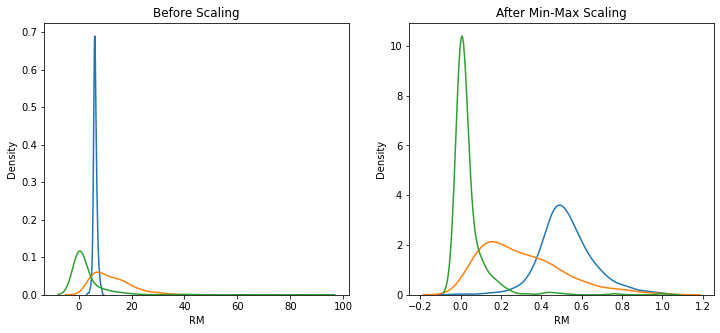

In [35]:
# so sánh phân phối của biến trước và sau khi co giãn

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# trước khi co giãn
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# sau khi co giãn
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

Các giá trị hiện bị giới hạn ở 1 nhưng các phân phối vẫn không căn căn giữa.

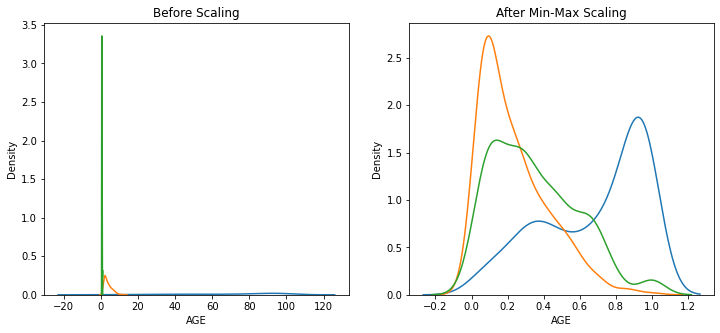

In [36]:
# so sánh phân phối của biến trước và sau khi co giãn

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# trước khi co giãn
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# sau khi co giãn
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

So sánh MaxAbsScaling và MinMaxScaling để xem khác biệt trong các phân phối trả về.

Ở phần này, chúng ta sẽ bàn về **Co giãn giá trị tuyệt đối lớn nhất**.

=================================================================

## Co giãn giá trị tuyệt đối lớn nhất - MaxAbsScaling

MaxAbsScaling co giãn dữ liệu thành giá trị tuyệt đối lớn nhất.

X_scaled = X / abs(X.max)

Kết quả của phép biến đổi trên là phân phối có các giá trị thay đổi trong khoảng từ -1 đến 1, nhưng giá trị trung bình không căn giữa ở 0 và độ lệch chuẩn thay đổi trên các biến.

Scikit-learn gợi ý sử dụng transformer có ý nghĩa với dữ liệu, với các dữ liệu thưa thớt và căn giữa ở 0.
 

Tóm lại, MaxAbsScaling:

- Không căn giữa ở 0 (nhưng có thể với một phương pháp khác)
- phương sai thay đổi trên các biến
- không giữ hình dạng của phân phối ban đầu
- nhạy với outlier


## Trong bản mô phỏng này

Chúng ta sẽ thực hiện co giãn về giá trị tuyệt đối lớn nhất sử dụng tập dữ liệu giá nhà ở boston với Scikit-learn.

Khi thực hiện co giãn giá trị tuyệt đối lớn nhất tập dữ liệu, trước tiên chúng ta cần xác định các giá trị lớn nhất của các biến. Các tham số này cần được học từ tập huấn luyện, lưu trữ rồi sử dụng để kiểm tra quy mô và dữ liệu trong tương lai. Vậy trước tiên, chúng ta sẽ chia dữ liệu thành tập huấn luyện và tập kiểm tra như đã thực hiện trong suốt khóa học.

### MaxAbsScaling

MaxAbsScaler từ scikit-learn co giãn lại các đặc trưng tới max mới là 1.

In [37]:
# thiết lập scaler
scaler = MaxAbsScaler()

# khớp scaler với tập huấn luyện, nó sẽ học các tham số
scaler.fit(X_train)

# biến đổi tập huấn luyện và tập kiểm tra
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# scaler lưu trữ max của các đặc trưng đã học từ tập huấn luyện
scaler.max_abs_

array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        36.98  ])

In [39]:
# biến đổi các mảng NumPy đã trả về vào các dataframe cho phần còn lại của
# bản mô phỏng

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [40]:
# hãy xem tập dữ liệu huấn luyện ban đầu: các giá trị tối đa
# sử dụng np.round để giảm số lượng số thập phân xuống còn 1

np.round(X_train.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,3.4,11.8,11.1,0.1,0.6,6.3,69.0,3.8,9.4,401.8,18.5,360.6,12.4
std,8.4,23.7,7.0,0.2,0.1,0.7,28.0,2.1,8.7,170.6,2.2,85.6,7.1
min,0.0,0.0,0.5,0.0,0.4,3.6,2.9,1.2,1.0,187.0,12.6,0.3,1.7
25%,0.1,0.0,5.0,0.0,0.4,5.9,45.2,2.1,4.0,276.0,17.4,376.1,6.7
50%,0.3,0.0,8.6,0.0,0.5,6.2,79.4,3.2,5.0,311.0,19.1,391.6,11.2
75%,3.1,20.0,18.1,0.0,0.6,6.6,93.8,5.1,24.0,666.0,20.2,395.7,16.7
max,89.0,100.0,27.7,1.0,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,37.0


In [41]:
# hãy xem tập dữ liệu huấn luyện đã co giãn: các giá trị tối đa
# sử dụng np.round để giảm số lượng số thập phân xuống còn 1

np.round(X_train_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,0.0,0.1,0.4,0.1,0.6,0.7,0.7,0.3,0.4,0.6,0.8,0.9,0.3
std,0.1,0.2,0.3,0.2,0.1,0.1,0.3,0.2,0.4,0.2,0.1,0.2,0.2
min,0.0,0.0,0.0,0.0,0.4,0.4,0.0,0.1,0.0,0.3,0.6,0.0,0.0
25%,0.0,0.0,0.2,0.0,0.5,0.7,0.5,0.2,0.2,0.4,0.8,0.9,0.2
50%,0.0,0.0,0.3,0.0,0.6,0.7,0.8,0.3,0.2,0.4,0.9,1.0,0.3
75%,0.0,0.2,0.7,0.0,0.7,0.8,0.9,0.4,1.0,0.9,0.9,1.0,0.5
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Các giá trị tối đa được điều chỉnh lại thành 1. Các tham số khác thay đổi trên các biến.

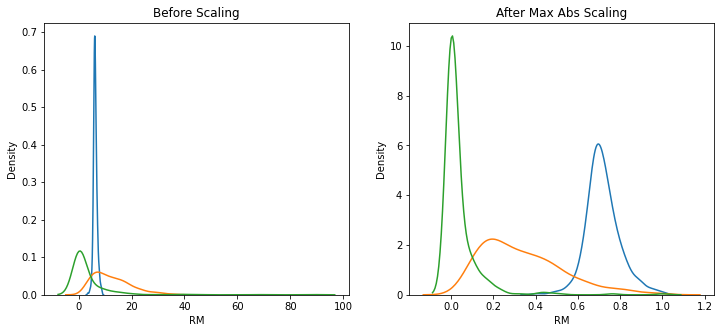

In [42]:
# so sánh phân phối của biến trước và sau khi co giãn

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# trước khi co giãn
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# sau khi co giãn
ax2.set_title('After Max Abs Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

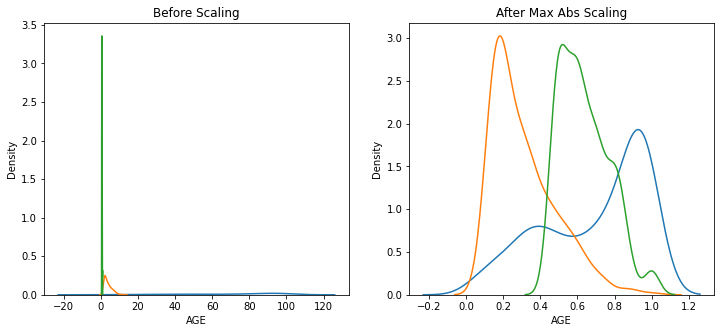

In [43]:
# so sánh phân phối của biến trước và sau khi co giãn

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# trước khi co giãn
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# sau khi co giãn
ax2.set_title('After Max Abs Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

### Căn giữa + MaxAbsScaling

Chúng ta có thể căn giữa các phân phối ở 0 rồi co lại thành giá trị tuyệt đối lơn nhất, như Scikit-learn gợi ý bằng cách kết hợp sử dụng 2 transformer.

In [44]:
# thiết lập StandardScaler để nó loại bỏ mean
# nhưng không chia cho độ lệch chuẩn
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# thiết lập MaxAbsScaler chuẩn hóa
scaler_maxabs = MaxAbsScaler()

# khớp scaler với tập huấn luyện để nó học các tham số
scaler_mean.fit(X_train)
scaler_maxabs.fit(X_train)

# biến đổi tập huấn luyện và tập kiểm tra
X_train_scaled = scaler_maxabs.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_maxabs.transform(scaler_mean.transform(X_test))

In [45]:
# biến đổi các mảng NumPy đã trả về vào các dataframe cho phần còn lại của
# bản mô phỏng

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

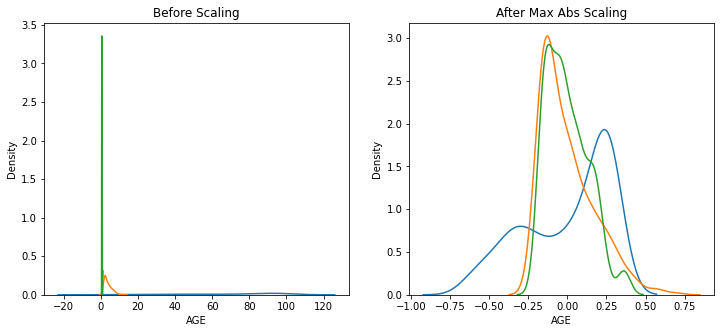

In [46]:
# so sánh phân phối của biến trước và sau khi co giãn

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# trước khi co giãn
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# sau khi co giãn
ax2.set_title('After Max Abs Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

Kết quả cũng tương tự chuẩn hóa trung bình, nhưng trong trường hợp này, các giá trị thay đổi trong một phạm vi hẹp hơn.

Ở phần này, chúng ta sẽ bàn về **Co giãn về trung vị và phân vị**

=================================================================

## Co giãn về trung vị và phân vị - RobustScaling

Trong quy trình này, median bị loại khỏi các quan sát rồi bị co lại lệ thành IQR. IQR là phạm vi giữa quartile thứ nhất (quantile thứ 25) và quartile thứ ba (quantile thứ 75).

X_scaled = X - X_median / ( X.quantile(0.75) - X.quantile(0.25) )

Phương pháp RobustScaling này tạo ra các ước tính mạnh mẽ hơn cho trung tâm và phạm vi của biến, và được khuyến nghị dùng nếu dữ liệu hiển thị outlier.

Tóm lại, RobustScaling:

- căn giữa ở 0
- phương sai thay đổi trên các biến
- không giữ hình dạng của phân phối ban đầu.
- các giá trị min, max thay đổi
- outlier mạnh mẽ


## Trong mô phỏng này

Chúng ta sẽ thực hiện RobustScaling sử dụng tập dữ liệu giá nhà ở Boston với Scikit-learn.

Khi thực hiện RobustScaling, trước tiên chúng ta cần xác định giá trị median và quantile của các biến. Các tham số này cần được học từ tập huấn luyện, lưu trữ rồi sử dụng để kiểm tra quy mô và dữ liệu trong tương lai. Vậy trước tiên, chúng ta sẽ chia dữ liệu thành huấn luyện và tập kiểm tra như đã thực hiện trong suốt khóa học.

### RobustScaling

MaxAbsScaler từ scikit-learn co các đặc trưng lại thành giá trị lớn nhất của chúng nên max mới là 1. 

In [47]:
## Yêu cầu 7
# thiết lập RobustScaler
scaler = RobustScaler()

# khớp scaler với tập huấn luyện, nó sẽ học các tham số
## VIẾT CODE Ở ĐÂY:
scaler.fit(X_train)

# biến đổi tập huấn luyện và tập kiểm tra
## VIẾT CODE Ở ĐÂY:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

<details><summary> Gợi ý </summary>

[RobustScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

</details>

In [48]:
# scaler lưu trữ giá trị median của các đặc trưng đã học từ tập huấn luyện
scaler.center_

array([2.62660e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00, 5.38000e-01,
       6.21550e+00, 7.94500e+01, 3.21570e+00, 5.00000e+00, 3.11000e+02,
       1.91000e+01, 3.91605e+02, 1.11600e+01])

In [49]:
# scaler lưu trữ giá trị IQR của các đặc trưng đã học từ tập huấn luyện

scaler.scale_

array([3.030275e+00, 2.000000e+01, 1.315000e+01, 1.000000e+00,
       1.792500e-01, 7.520000e-01, 4.857500e+01, 2.971650e+00,
       2.000000e+01, 3.900000e+02, 2.800000e+00, 1.963250e+01,
       9.982500e+00])

In [50]:
# biến đổi các mảng NumPy đã trả về vào các dataframe cho phần còn lại của
# bản mô phỏng

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [51]:
# hãy xem tập dữ liệu huấn luyện ban đầu: các giá trị median
# sử dụng np.round để giảm số lượng số thập phân xuống còn 1

np.round(X_train.median(), 1)

CRIM         0.3
ZN           0.0
INDUS        8.6
CHAS         0.0
NOX          0.5
RM           6.2
AGE         79.4
DIS          3.2
RAD          5.0
TAX        311.0
PTRATIO     19.1
B          391.6
LSTAT       11.2
dtype: float64

In [52]:
# hãy xem tập dữ liệu huấn luyện đã co giãn: các giá trị median
# sử dụng np.round để giảm số lượng số thập phân xuống còn 1

np.round(X_train_scaled.median(), 1)

CRIM      -0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM        -0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B         -0.0
LSTAT      0.0
dtype: float64

Các biến tập trung vào các median.

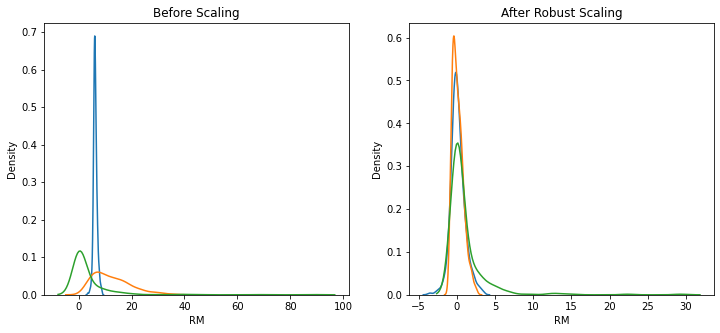

In [53]:
# so sánh phân phối của biến trước và sau khi co giãn

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# trước khi co giãn
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# sau khi co giãn
ax2.set_title('After Robust Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

Median của các phân phối được căn giữa ở 0, nhưng mọi tham số khác có thể thay đổi theo các biến khác nhau. Tuy nhiên, nó nén phạm vi giá trị trong các biến ban đầu, đặc biệt là với những biến bị lệch nhiều như CRIM.

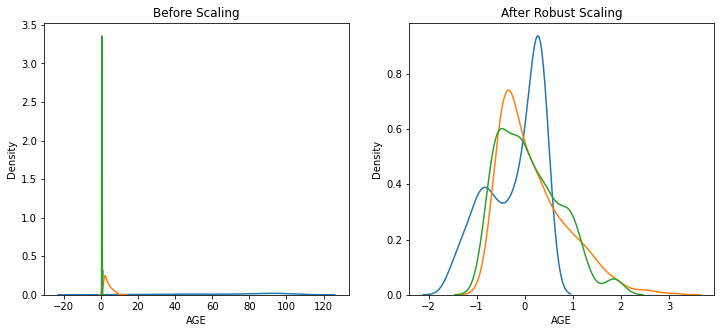

In [54]:
# so sánh phân phối của biến trước và sau khi co giãn

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# trước khi co giãn
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# sau khi co giãn
ax2.set_title('After Robust Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

So sánh co giãn này với chuẩn hóa trung bình để xem quy trình này tác động thế nào tới hình dạng của phân phối.

Trong notebook này, chúng ta sẽ bàn về **Co giãn về độ dài vectơ đơn vị**.

=================================================================

## Co giãn về độ dài vectơ đơn vị/chuẩn đơn vị

Trong quy trình này, chúng ta co giãn các thành phần của vectơ đặc trưng sao cho vectơ hoàn chỉnh có độ dài là 1, hoặc nói cách khác, có chuẩn là 1. **Lưu ý** rằng quy trình chuẩn hóa này sẽ chuẩn hóa vectơ **đặc trưng** chứ không phải vectơ **quan sát**. Vì vậy, chúng ta chia chuẩn của vectơ đặc trưng cho từng quan sát trên các biến khác nhau mà không phải chia chuẩn của vectơ **quan sát** cho các quan sát có cùng đối tượng.

Trước tiên, chúng ta hãy xem công thức rồi minh họa với một ví dụ.

### Công thức Co giãn về vectơ đơn vị 

Co giãn về vectơ đơn vị được tính bằng cách chia từng vectơ đặc trưng cho khoảng cách Manhattan (chuẩn l1) hoặc khoảng cách Euclid của vectơ (chuẩn l2):

X_scaled_l1 = X / l1(X)

X_scaled_l2 = X / l2(X)


**Khoảng cách Manhattan** là tổng các thành phần tuyệt đối của vectơ:  

l1(X) = |x1| + |x2| + ... + |xn|


Còn **khoảng cách Euclid** được tính bằng căn bậc hai của tổng các thành phần của vectơ:

l2(X) = sqr( x1^2 + x2^2 + ... + xn^2 )


Trong ví dụ trên, x1 là biến 1, x2 là biến 2 và xn là biến n; X là dữ liệu cho 1 quan sát trên các biến (hay 1 hàng).

Cũng **lưu ý** rằng khi khoảng cách Euclid bình phương các giá trị của các thành phần vectơ đặc trưng, outlier sẽ có trọng số lớn hơn. Chúng ta thường ưu tiên sử dụng chuẩn hóa l1 với outlier.


###  Ví dụ cho Co giãn về vectơ đơn vị 

Giả sử dữ liệu có 1 quan sát (1 hàng) và 3 biến:

- number of pets (số thú nuôi)
- number of children (số trẻ em )
- age (tuổi)

Giá trị của từng biến cho quan sát riêng lẻ đó là 10, 15 và 20. Vectơ X = [10, 15, 20]. Sau đó:

l1(X) = 10 + 15 + 20 = 45

l2(X) = sqr( 10^2 + 15^2 + 20^2) = sqr( 100 + 225 + 400) = **26.9**

Khoản cách Euclid luôn nhỏ hơn khoảng cách Manhattan.


Do đó các giá trị vectơ được chuẩn hóa là:

X_scaled_l1 = [ 10/45, 15/45, 20/45 ]      =  [0.22, 0.33, 0.44]

X_scaled_l2 = [10/26.9, 15/26.9, 20/26.9 ] =  [0.37, 0.55, 0.74]


Scikit-learn đề xuất quy trình co giãn này cho phân loại hoặc phân cụm văn bản. Ví dụ: tích vô hướng của hai vectơ TF-IDF được chuẩn hóa l2 là độ tương tự cosin của các vectơ và là thước đo độ tương tự cơ sở cho Mô hình không gian vectơ thường được cộng đồng Truy xuất thông tin sử dụng.


## Trong bản mô phỏng này

Chúng ta sẽ thực hiện co giãn về độ dài đơn vị sử dụng tập dữ liệu giá nhà ở Boston với Scikit-learn. 

Khi co giãn về độ dài đơn vị thực hiện trên các biến và từng quan sát, khoảng cách thay đổi với mỗi quan sát. Do đó, chúng ta không cần tìm hiểu các tham số và lưu trữ chúng. Co giãn xảy ra trên mức độ từng quan sát. Vì vậy, về bản chất, chúng ta không cần chia thành tập huấn luyện và tập kiểm tra.

Tuy nhiên, có thể chúng ta đã thực hiện điều này để triển khai các bước thiết kế đặc trưng khác nên hãy tiếp tục làm như vậy ở đây. 

### Co giãn thành l1

In [55]:
## Yêu cầu 8
# thiết lập Normalizer
scaler = Normalizer(norm='l1')

# khớp scaler, quy trình này sẽ KHÔNG THỰC HIỆN BẤT CỨ ĐIỀU GÌ
## VIẾT CODE Ở ĐÂY:
scaler.fit(X_train)

# biến đổi tập huấn luyện và tập kiểm tra
## VIẾT CODE Ở ĐÂY:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

<details><summary> Gợi ý </summary>

[Normalizer()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html)

</details>

In [56]:
# tính chuẩn cho từng quan sát (vectơ đặc trưng)
# dữ liệu gốc

np.round( np.linalg.norm(X_train, ord=1, axis=1), 1)

array([1024.1,  744. , 1003.5,  858. ,  732.4,  859.3,  845.9,  847. ,
        888.1,  826.7,  705.9,  808.9,  734. ,  784.6,  785.1,  819.6,
       1212.9, 1258. ,  757.6, 1223. , 1236.1,  890.2, 1166.8, 1270. ,
        919. ,  925.9, 1197. ,  770.3, 1118. ,  886.7,  719. ,  952. ,
        933.4,  745. ,  805.6,  825.1,  678.5,  947.7,  910. ,  816. ,
        769.1,  832.4,  763.5,  777. ,  850.4, 1137.7,  802.1,  703.4,
        802.6,  688. ,  801.8,  877.3,  753.8,  912.4,  936.7,  813.6,
       1194. ,  771.9,  739.5,  825.9,  890.8,  891.6,  844.4,  927.1,
        998.6,  903.3, 1250.3,  739.5, 1095.3,  857.7,  834.8,  738.4,
        855.1, 1238.4,  828.6,  958.4,  775. ,  923.4,  859.6,  830.7,
        782.3,  796.8,  953.2,  857.9, 1249.9,  716.7,  803.9,  978.8,
       1186.9,  904. , 1238.2,  981.6,  884.9,  924.9,  694.1,  725.2,
        832.4,  717.7,  917. , 1263.9,  836.7,  813.5,  992.5,  823.4,
       1224.3,  712.1,  841.2,  950.3,  702.6,  791.9,  830.4,  742.1,
      

In [57]:
# tính chuẩn cho từng quan sát (vectơ đặc trưng)
# dữ liệu đã co giãn

np.round( np.linalg.norm(X_train_scaled, ord=1, axis=1), 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

Bây giờ mỗi vectơ đặc trưng có một chuẩn l1 là 1. 

In [58]:
# biến đổi các mảng NumPy đã trả về vào các dataframe cho phần còn lại của
# bản mô phỏng

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [59]:
# xem từng giá trị riêng lẻ của các biến trong dữ liệu ban đầu
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.358284,11.809322,11.078757,0.064972,0.556098,6.308427,68.994068,3.762459,9.353107,401.782486,18.473446,360.601186,12.440650
std,8.353223,23.653056,6.993821,0.246825,0.115601,0.702009,28.038429,2.067661,8.671999,170.592404,2.224809,85.621945,7.078485
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.174200,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.073425,0.000000,4.950000,0.000000,0.450000,5.895250,45.175000,2.107650,4.000000,276.000000,17.400000,376.057500,6.735000
50%,0.262660,0.000000,8.560000,0.000000,0.538000,6.215500,79.450000,3.215700,5.000000,311.000000,19.100000,391.605000,11.160000
75%,3.103700,20.000000,18.100000,0.000000,0.629250,6.647250,93.750000,5.079300,24.000000,666.000000,20.200000,395.690000,16.717500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [60]:
# xem từng giá trị riêng lẻ của các biến trong dữ liệu ban đầu

X_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,0.003022,0.014491,0.011731,0.000073,0.000620,0.007221,0.075687,0.004479,0.009336,0.427642,0.020880,0.411273,0.013544
std,0.007018,0.028764,0.006854,0.000283,0.000115,0.001620,0.029466,0.002780,0.007262,0.114922,0.003751,0.124328,0.007204
min,0.000008,0.000000,0.000577,0.000000,0.000424,0.002996,0.004348,0.000919,0.001163,0.250885,0.014363,0.000374,0.001879
25%,0.000093,0.000000,0.006243,0.000000,0.000545,0.006061,0.055411,0.002206,0.004740,0.346035,0.016876,0.318534,0.008473
50%,0.000311,0.000000,0.010421,0.000000,0.000611,0.007376,0.078917,0.003923,0.006021,0.393483,0.021129,0.456271,0.012262
75%,0.002983,0.024709,0.015120,0.000000,0.000657,0.008358,0.098186,0.006456,0.018223,0.526258,0.024014,0.498519,0.017204
max,0.066782,0.121905,0.035787,0.001422,0.001337,0.011541,0.144310,0.016269,0.028684,0.795970,0.030523,0.578661,0.041723


Các giá trị bị nén trong phạm vi giá trị nhỏ hơn.

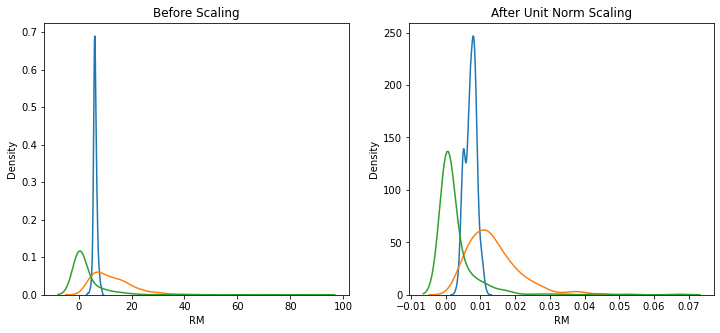

In [61]:
# so sánh phân phối của biến trước và sau khi co giãn

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# trước khi co giãn
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# sau khi co giãn
ax2.set_title('After Unit Norm Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

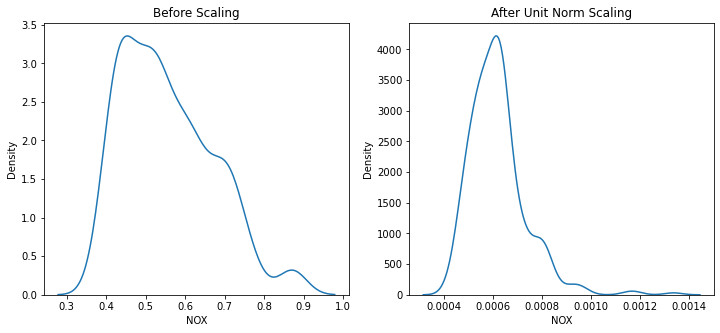

In [62]:
# so sánh phân phối của biến trước và sau khi co giãn
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# trước khi co giãn
ax1.set_title('Before Scaling')
#sns.kdeplot(X_train['AGE'], ax=ax1)
#sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# sau khi co giãn
ax2.set_title('After Unit Norm Scaling')
#sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
#sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

Chuẩn hóa này thay đổi phân phối ban đầu của biến khá nhiều. Hãy tiếp tục và chú giải các biến khác để hiểu rõ hơn.

### Co giãn thành l2

In [63]:
## Yêu cầu 9
# thiết lập scaler
## VIẾT CODE Ở ĐÂY:
scaler = Normalizer(norm='l2')

# khớp scaler, quy trình này sẽ KHÔNG THỰC HIỆN BẤT CỨ ĐIỀU GÌ
## VIẾT CODE Ở ĐÂY:
scaler.fit(X_train)

# biến đổi tập huấn luyện và tập kiểm tra
## VIẾT CODE Ở ĐÂY:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

<details><summary> Gợi ý </summary>

[Normalizer()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html)

</details>

In [64]:
# tính chuẩn cho từng quan sát (vectơ đặc trưng)
# dữ liệu ban đầu

np.round( np.linalg.norm(X_train, ord=2, axis=1), 1)

array([600.5, 458.4, 598. , 519.1, 434. , 511. , 527.9, 496.7, 675.2,
       496.5, 450.2, 492.1, 453.5, 492.4, 492.9, 491.5, 770.1, 782.2,
       465.2, 759.8, 778.6, 535.3, 764.4, 781.5, 561.9, 562.8, 768.1,
       468.2, 725.5, 673.1, 458.8, 572.5, 559.8, 488. , 490.2, 488.9,
       441.3, 680.4, 675.6, 483.9, 483.9, 506.2, 474.8, 481.9, 517.8,
       747.8, 503.3, 438.2, 483. , 424. , 478.8, 519.9, 451.4, 546.2,
       558.3, 516.9, 773.8, 470.4, 467.5, 501.6, 674.5, 528.1, 508.2,
       677.1, 593.2, 556.5, 781.9, 465.9, 707.6, 509.6, 501.3, 449.4,
       512.5, 778.8, 483.6, 587.7, 485.4, 558.1, 673.1, 504.6, 494.9,
       509. , 589.2, 510.6, 777. , 439.2, 478.8, 593.3, 760. , 534.5,
       779.9, 586.6, 551.3, 558.4, 446.2, 418.8, 496. , 407.8, 676.2,
       782.8, 671. , 499. , 593.6, 482.6, 779.2, 456.1, 483.4, 573.4,
       456.5, 477.3, 493.3, 485.7, 490.5, 716.1, 497.2, 760.6, 524.9,
       672.1, 488.2, 443.7, 751. , 492.5, 424.3, 458.7, 783. , 596.4,
       482.9, 557.2,

In [65]:
# tính chuẩn cho từng quan sát (vectơ đặc trưng)
# dữ liệu đã co giãn

np.round( np.linalg.norm(X_train_scaled, ord=2, axis=1), 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [66]:
# biến đổi các mảng NumPy đã trả về vào các dataframe cho phần còn lại của
# bản mô phỏng

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [67]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.358284,11.809322,11.078757,0.064972,0.556098,6.308427,68.994068,3.762459,9.353107,401.782486,18.473446,360.601186,12.440650
std,8.353223,23.653056,6.993821,0.246825,0.115601,0.702009,28.038429,2.067661,8.671999,170.592404,2.224809,85.621945,7.078485
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.174200,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.073425,0.000000,4.950000,0.000000,0.450000,5.895250,45.175000,2.107650,4.000000,276.000000,17.400000,376.057500,6.735000
50%,0.262660,0.000000,8.560000,0.000000,0.538000,6.215500,79.450000,3.215700,5.000000,311.000000,19.100000,391.605000,11.160000
75%,3.103700,20.000000,18.100000,0.000000,0.629250,6.647250,93.750000,5.079300,24.000000,666.000000,20.200000,395.690000,16.717500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [68]:
X_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,0.004688,0.024027,0.018758,0.000120,0.000997,0.011640,0.122166,0.007251,0.014647,0.682156,0.033589,0.668592,0.021765
std,0.011049,0.048105,0.010982,0.000463,0.000187,0.002718,0.048931,0.004588,0.010624,0.152037,0.006168,0.203917,0.011661
min,0.000013,0.000000,0.000963,0.000000,0.000681,0.004682,0.006431,0.001499,0.001911,0.425977,0.024238,0.000475,0.003099
25%,0.000148,0.000000,0.010430,0.000000,0.000883,0.009432,0.088582,0.003363,0.007875,0.565434,0.027163,0.507064,0.013486
50%,0.000515,0.000000,0.016919,0.000000,0.000979,0.012099,0.126282,0.006399,0.010027,0.639890,0.033567,0.753246,0.019929
75%,0.004750,0.041516,0.023812,0.000000,0.001060,0.013580,0.158637,0.010516,0.030581,0.850914,0.038620,0.809355,0.027524
max,0.113081,0.207644,0.061249,0.002282,0.002053,0.018156,0.237626,0.027624,0.035766,0.992514,0.053097,0.889808,0.070063


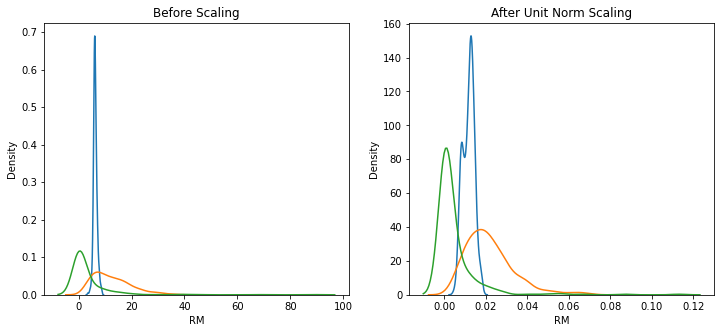

In [69]:
# so sánh phân phối của biến trước và sau khi co giãn

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# trước khi co giãn
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# sau khi co giãn
ax2.set_title('After Unit Norm Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

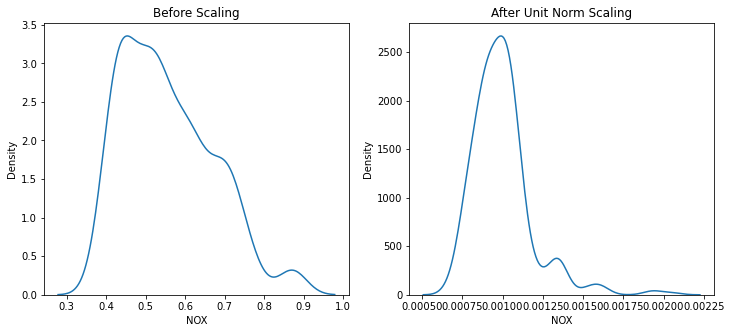

In [70]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# trước khi co giãn
ax1.set_title('Before Scaling')
#sns.kdeplot(X_train['AGE'], ax=ax1)
#sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# sau khi co giãn
ax2.set_title('After Unit Norm Scaling')
#sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
#sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()